# Primer Examen 15%

**Estudiante:** Andrés Felipe Riaño Quintanilla

**Documento:** 1083928808

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'

2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'. 
Note que al final el DataFrame debe quedar con tres columnas adicionales

3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione la fila con el índice correspondiente a ese número entero  y con base en la columna '`solution`': construya un polinomio con esa lista de enteros como coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: 
* el polinomio generado, sus raices (como puntos en el gráfico) y la derivada del polinomio. 
* Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). 
* Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


**Solución 1):**

In [1]:
import pandas as pd

In [4]:
df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [16]:
df.solution.apply(lambda l: max([abs(i) for i in l]))  #Columna con el valor máximo en valor absoluto de las listas de solution.

0          6
1          4
2          6
3          7
4          8
          ..
390069    32
390070    28
390071    32
390072    31
390073    23
Name: solution, Length: 390074, dtype: int64

In [17]:
df['smax']=df.solution.apply(lambda l: max([abs(i) for i in l]))  #Se agrega la columna anterior al dataframe.
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


**Solución 2):**

In [18]:
df.solution.apply(lambda l: sum(l))  #Columna con la suma de los valores de las listas de la columna solution.

0         0
1         0
2         0
3         0
4         0
         ..
390069    0
390070    0
390071    0
390072    0
390073    0
Name: solution, Length: 390074, dtype: int64

In [22]:
df["sum_s"]=df.solution.apply(lambda l: sum(l))  #Se agrega la columna anterior al dataframe.
df

,l,k,solution,gcd,n,smax,sum_s
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0
...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0


In [27]:
df.solution.apply(lambda l: sum([i**3 for i in l]))  #Columna con la suma de los cubos de los elementos de las listas de la columna solution.

0         0
1         0
2         0
3         0
4         0
         ..
390069    0
390070    0
390071    0
390072    0
390073    0
Name: solution, Length: 390074, dtype: int64

In [24]:
df["sum_s³"]=df.solution.apply(lambda l: sum([i**3 for i in l])) #Se agrega la columna anterior al dataframe.
df

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


**Solución 3):**

In [32]:
import numpy as np

In [39]:
np.random.seed(1083928808)
fila=np.random.randint(0,390073)  #Índice de la fila
fila

14408

In [43]:
coeficientes=df.loc[fila,'solution']  #Lista con los coeficientes del polinomio a generar.
coeficientes

[1, -2, -3, -3, -12, -13, 16, 18, -28, 29, 29, -32]

In [160]:
P = np.poly1d(coeficientes)  #Polinomio generado.
print(P)

   11     10     9     8      7      6      5      4      3      2
1 x  - 2 x  - 3 x - 3 x - 12 x - 13 x + 16 x + 18 x - 28 x + 29 x + 29 x - 32


**Gráfico preliminar:** El siguiente gráfico no es el que se pretende entregar. Es solamente una ayuda para visualizar el polinomio.

In [47]:
import matplotlib.pyplot as plt

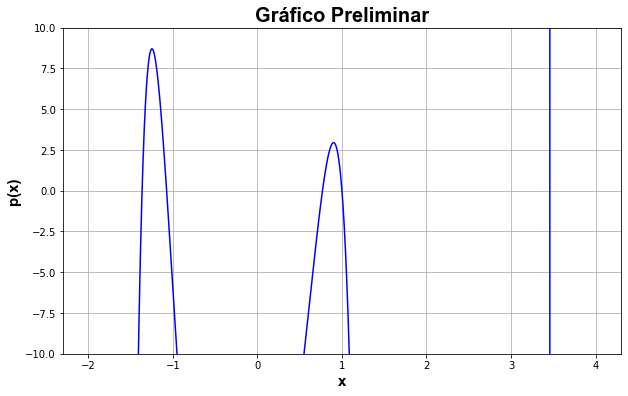

In [161]:
xp=np.linspace(-2,4,10000)
yp=P(xp)
plt.figure(figsize=(10,6))
plt.plot(xp,yp,'-',color='blue')
font = {'family' : 'Arial', 'weight' : 'bold', 'size'   : 20} 
font2={'family' : 'Arial', 'weight' : 'bold', 'size' : 15}
plt.title('Gráfico Preliminar', **font),plt.xlabel('x', **font2),plt.ylabel('p(x)', **font2)
plt.ylim(-10,10)
plt.grid()
plt.show()

Como es difícil saber si fuera del intervalo graficado hay más raíces, esto se verificará de la siguiente forma.

In [68]:
intervalo1=np.linspace(-10000,-2,1000000)  #Se toman los intervalos [-10000,-2] y [4,10000] y se verifica si en ellos 
intervalo2=np.linspace(4,10000,1000000)   #hay cambios de signo.

In [162]:
False in P(intervalo1)<0 #¿Hay números positivos en el intervalo [-10000,-2]?: No

False

In [163]:
False in P(intervalo2)>0 #¿Hay números negativos en el intervalo [4,10000]?: No

False

Como en $[-10000,-2]$ y en $[4,10000]$ no hay cambios de signo, es muy poco probable que hayan raíces para $x<-2$ y para $x>4$. Por lo tanto, se hallarán las 5 raíces que aparecen en la gráfica.

In [71]:
from scipy import optimize

In [164]:
#Raíces del polinomio.

root1=optimize.bisect(P,-1.2,-1.4,xtol=1e-16,rtol=9e-16,maxiter=1000)
root2=optimize.bisect(P,-1.2,-0.5,xtol=1e-16,rtol=9e-16,maxiter=1000)
root3=optimize.bisect(P,0.5,0.8,xtol=1e-16,rtol=9e-16,maxiter=1000)
root4=optimize.bisect(P,0.8,1.2,xtol=1e-16,rtol=9e-16,maxiter=1000)
root5=optimize.bisect(P,3,4,xtol=1e-16,rtol=9e-16,maxiter=1000)

roots=np.array([root1,root2,root3,root4,root5])

**Gráfico definitivo**

In [166]:
#Primero hallemos la derivada del polinomio p.

dP=P.deriv()

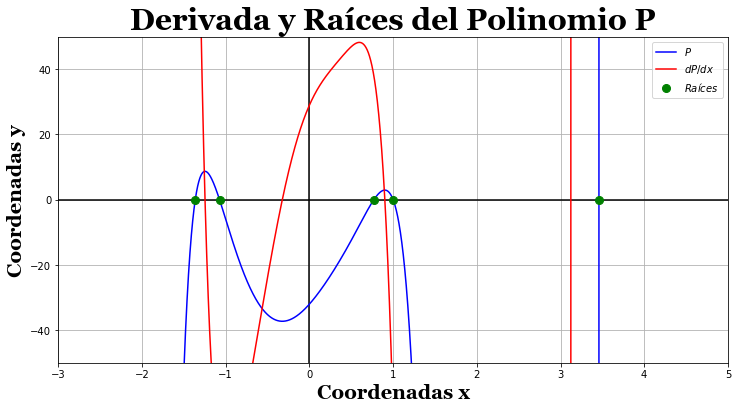

In [177]:
x=np.linspace(-2,4,10000)

plt.figure(figsize=(12,6))
font1 = {'family' : 'Georgia', 'weight' : 'bold', 'size'   : 30}
font2 = {'family' : 'Georgia', 'weight' : 'bold', 'size'   : 20}
plt.title('Derivada y Raíces del Polinomio P',**font1)
plt.plot([-5,5],[0,0],linestyle='-',color='black'), plt.plot([0,0],[-50,50],linestyle='-',color='black')

plt.plot(x,P(x),label='$P$',linestyle='-',color='blue'),plt.plot(x,dP(x),label='$dP/dx$', linestyle='-',color='red')
plt.plot(roots,P(roots),label='$Raíces$',color='green',marker='o',linestyle='',markersize=8)
plt.xlabel('Coordenadas x', **font2)
plt.ylabel('Coordenadas y', **font2)
plt.xlim(-3,5)
plt.ylim(-50,50)
plt.legend()
plt.grid()
plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$

III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$

IV) Encuentre las soluciones a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

**Solución I):**

In [152]:
np.random.seed(1083928808)
número=np.random.randint(1,5)  
número

1

**Solución II):**

De acuerdo con el número obtenido, la elección es: $$x\operatorname{e}^x=p\,$$

**Solución III):**

In [170]:
np.random.seed(1083928808)
p=np.random.uniform(0,1)
p

0.4383578465040612

**Solución IV):**

**Gráfica preliminar:** El siguiente gráfico no es el que se pretende entregar. Es solamente una ayuda para visualizar $xe^x-p=0$.

In [182]:
def ft(x):  #Defino a la función trascendental.
    return x*np.exp(x)

def ftp(x,p):
    return (x*np.exp(x))-p  #Defino a la función xe^x-p

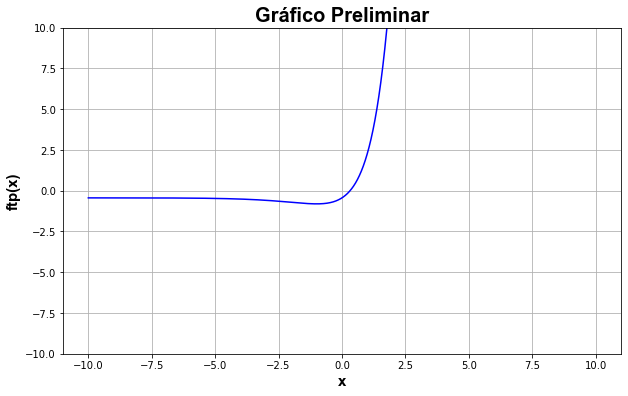

In [189]:
xp=np.linspace(-10,10,10000)
plt.figure(figsize=(10,6))
plt.plot(xp,ftp(xp,p),'-',color='blue')
font = {'family' : 'Arial', 'weight' : 'bold', 'size'   : 20} 
font2={'family' : 'Arial', 'weight' : 'bold', 'size' : 15}
plt.title('Gráfico Preliminar', **font),plt.xlabel('x', **font2),plt.ylabel('ftp(x)', **font2)
plt.ylim(-10,10)
plt.grid()
plt.show()

En el intervalo $[-10,10]$ tan solo hay una solución para $xe^x-p=0$

In [188]:
#Solución a la ecuación trascendental.
Root=optimize.bisect(ftp,-2,2,xtol=1e-16,rtol=9e-16,maxiter=1000,args=(p))
Root

0.31872062925380695

**Gráfico definitivo**

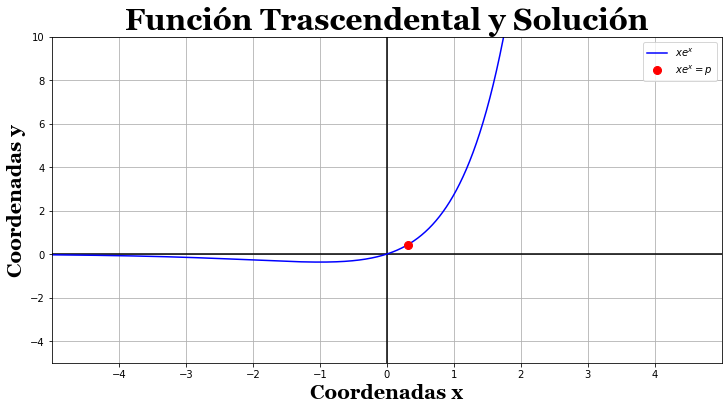

In [202]:
X=np.linspace(-10,10,10000)



plt.figure(figsize=(12,6))
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
font1 = {'family' : 'Georgia', 'weight' : 'bold', 'size'   : 30}
font2 = {'family' : 'Georgia', 'weight' : 'bold', 'size'   : 20}
plt.title('Función Trascendental y Solución',**font1)
plt.plot([-5,5],[0,0],linestyle='-',color='black'), plt.plot([0,0],[-50,50],linestyle='-',color='black')
plt.plot(X,ft(X),label='$xe^x$',linestyle='-',color='blue')
plt.plot(Root,ft(Root),label='$xe^x=p$',color='red',marker='o',linestyle='',markersize=8)
plt.xlabel('Coordenadas x', **font2)
plt.ylabel('Coordenadas y', **font2)
plt.xlim(-5,5)
plt.ylim(-5,10)
plt.legend()
plt.grid()
plt.show()

## Nota:

Entrego este parcial tan tarde, porque comencé a resolverlo a las 2:00 pm, pues de 12:00 m a 2:00 pm tenía clase de Cálculo 2. Agradezco su comprensión.